In [1]:
import numpy as np
import glob, os
from keras import layers as ly
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import keras.backend.tensorflow_backend as K
from keras.optimizers import Adam
from keras.layers import Input, LSTM, RepeatVector, Lambda
from keras.models import Model
import copy
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Using TensorFlow backend.


In [2]:
dir = './latest_sequence/dfs/*'

# file read
all_data = []
sequence_length = []
name = []
for file in sorted(glob.glob(dir)):
    name.append(file.split('/')[2].replace('.txt', ''))
    datasets = []
    for f in open(file, 'r'):
        f = f.replace(']', '').replace('[', '').replace('\n','')
        (u, v, w) = f.split(',')
        datasets.append([int(u), int(v), float(w)])
    sequence_length.append(len(datasets))
    all_data.append(datasets)
#all_data = np.array(all_data)
all_data = np.array([np.array(arr) for arr in all_data])

In [3]:
x_train, x_test, train_name, test_name = train_test_split(all_data, name, test_size=0.3)
x_test, x_val, test_name, val_name = train_test_split(x_test, test_name, test_size=0.33)

In [4]:
n_features = 3
#batch_size = 32
epochs = 500
steps_per_epoch = len(x_train)

In [5]:
def repeat_vector(args):
    layer_to_repeat = args[0]
    sequence_layer = args[1]
    return RepeatVector(K.shape(sequence_layer)[1])(layer_to_repeat)

In [6]:
inputs = Input(shape=(None, n_features))
encoded = LSTM(128, return_sequences=True)(inputs)  #activation 안적으면 tanh
encoded = LSTM(64)(encoded)
#encoded = LSTM(32, activation='relu')(encoded)

decoded = Lambda(repeat_vector, output_shape=(None, 64)) ([encoded, inputs]) # inputs의 shape[1] 만큼 encoded 를 반복 생성

#decoded = LSTM(32, return_sequences=True)(decoded)
decoded = LSTM(64, return_sequences=True)(decoded)
decoded = LSTM(128, return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(n_features))(decoded)

W0923 12:29:45.342984 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 12:29:45.351457 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 12:29:45.356769 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
encoder = Model(inputs, encoded)

In [8]:
lstm_autoencoder = Model(inputs, decoded)
lstm_autoencoder.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

W0923 12:29:49.794260 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
def train_generator(x_train):
    idx = 0
    while True:
        yield np.array([x_train[idx]]), np.array([x_train[idx]])
        idx +=1
        if idx >= len(x_train):
            idx = 0

In [ ]:
lstm_autoencoder.fit_generator(train_generator(x_train), epochs=200, steps_per_epoch=steps_per_epoch, verbose=1)#, validation_data=val_generator(x_val))

W0923 12:29:58.931505 139839473231616 deprecation.py:323] From /home/minji/anaconda3/envs/graph/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0923 12:30:00.383889 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0923 12:30:00.502443 139839473231616 deprecation_wrapper.py:119] From /home/minji/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
2352/2352 [==============================] - 31s 13ms/step - loss: 36.0151
Epoch 2/200
2352/2352 [==============================] - 27s 12ms/step - loss: 34.6492
Epoch 3/200
2352/2352 [==============================] - 28s 12ms/step - loss: 34.5668
Epoch 4/200
2352/2352 [==============================] - 27s 12ms/step - loss: 34.5540
Epoch 5/200
2352/2352 [==============================] - 27s 12ms/step - loss: 28.6956
Epoch 6/200
2352/2352 [==============================] - 27s 12ms/step - loss: 13.3505
Epoch 7/200
2352/2352 [==============================] - 30s 13ms/step - loss: 10.8388
Epoch 8/200
2352/2352 [==============================] - 28s 12ms/step - loss: 9.5995
Epoch 9/200
2352/2352 [==============================] - 28s 12ms/step - loss: 8.8672
Epoch 10/200
2352/2352 [==============================] - 27s 12ms/step - loss: 8.1404
Epoch 11/200
2352/2352 [==============================] - 27s 11ms/step - loss: 7.2972
Epoch 12/200
2352/2352 [=====================

2352/2352 [==============================] - 28s 12ms/step - loss: 0.4625
Epoch 96/200
2352/2352 [==============================] - 28s 12ms/step - loss: 0.5068
Epoch 97/200
2352/2352 [==============================] - 28s 12ms/step - loss: 0.6412
Epoch 98/200
2352/2352 [==============================] - 27s 12ms/step - loss: 0.4697
Epoch 99/200
2352/2352 [==============================] - 27s 12ms/step - loss: 0.4818
Epoch 100/200
2352/2352 [==============================] - 28s 12ms/step - loss: 0.6875
Epoch 101/200
2352/2352 [==============================] - 27s 12ms/step - loss: 0.4902
Epoch 102/200
2352/2352 [==============================] - 27s 11ms/step - loss: 0.5927
Epoch 103/200
2352/2352 [==============================] - 27s 12ms/step - loss: 0.5660
Epoch 104/200
2352/2352 [==============================] - 27s 11ms/step - loss: 0.5127
Epoch 105/200
2352/2352 [==============================] - 27s 11ms/step - loss: 0.5234
Epoch 106/200
2352/2352 [=========================

In [ ]:
# model save
lstm_autoencoder.save('./model/lstm_autoencoder200_dfs.h5')

In [ ]:
loaded_model = load_model('model/lstm_autoencoder_dfs.h5')

In [ ]:
mean= 0
for xt in x_test:
    xt = xt.reshape(1, xt.shape[0], xt.shape[1])
    out = loaded_model.predict(xt)
    mean += ((xt-out)**2).mean(axis=None)
print(mean/len(x_test))

In [7]:
import import_ipynb
import drawingGraph as G

importing Jupyter notebook from drawingGraph.ipynb


In [8]:
encoder = Model(loaded_model.input, loaded_model.layers[3].output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 3)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         67584     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
Total params: 129,408
Trainable params: 129,408
Non-trainable params: 0
_________________________________________________________________


In [9]:
latent_vector = []
for test in x_test:
    latent_vector.append(encoder.predict(test.reshape(1,test.shape[0], test.shape[1])))

In [10]:
len(x_test), len(latent_vector), len(test_name)

(126, 126, 126)

In [20]:
for name in test_name:
    print(name.split('-')[0])

pgraph17
pgraph25
pgraph59
pgraph10
pgraph79
pgraph42
pgraph23
pgraph9
pgraph94
pgraph94
pgraph30
pgraph3
pgraph35
pgraph5
pgraph13
pgraph73
pgraph58
pgraph51
pgraph54
pgraph24
pgraph4
pgraph85
pgraph12
pgraph36
pgraph97
pgraph35
pgraph13
pgraph70
pgraph52
pgraph93
pgraph64
pgraph45
pgraph2
pgraph28
pgraph98
pgraph99
pgraph28
pgraph18
pgraph90
pgraph3
pgraph39
pgraph82
pgraph67
pgraph92
pgraph8
pgraph84
pgraph28
pgraph12
pgraph9
pgraph28
pgraph6
pgraph91
pgraph4
pgraph51
pgraph29
pgraph1
pgraph22
pgraph3
pgraph65
pgraph60
pgraph56
pgraph32
pgraph8
pgraph53
pgraph39
pgraph32
pgraph6
pgraph32
pgraph47
pgraph57
pgraph44
pgraph24
pgraph43
pgraph36
pgraph0
pgraph14
pgraph38
pgraph16
pgraph83
pgraph15
pgraph39
pgraph0
pgraph21
pgraph44
pgraph75
pgraph73
pgraph60
pgraph7
pgraph27
pgraph96
pgraph7
pgraph29
pgraph58
pgraph2
pgraph99
pgraph32
pgraph78
pgraph60
pgraph19
pgraph91
pgraph70
pgraph1
pgraph48
pgraph37
pgraph49
pgraph14
pgraph5
pgraph78
pgraph23
pgraph11
pgraph59
pgraph22
pgraph80
pgra

In [11]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum(a-b) ** 2)

In [12]:
test_obj = latent_vector[0]

In [13]:
dist = []
for vector in latent_vector[1:]:
    dist.append(euclidean_distance(test_obj, vector))
len(dist)

125

In [14]:
test_obj_name = test_name[0]

In [15]:
def getGraphName(distance):
    ordered = copy.deepcopy(distance)
    ordered.sort()
    names = []
    sequences = []

    for item in ordered:
        for index,dist  in enumerate(distance):
            if item == dist:
                names.append(test_name[index+1])
                sequences.append(x_test[index+1])
                break
    return names, sequences

In [16]:
names, sequences = getGraphName(dist)
len(names), len(sequences)

(125, 125)

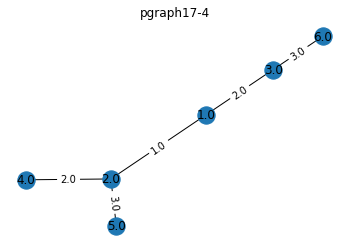

In [17]:
G.drawGraph('', test_name[0], 1, x_test[0], False)

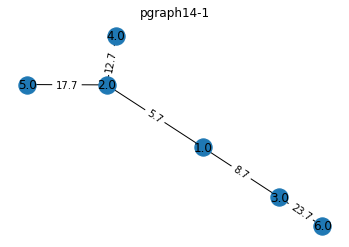

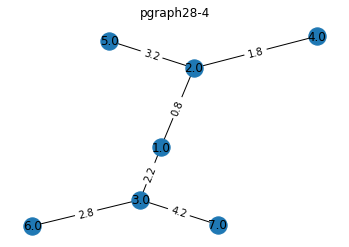

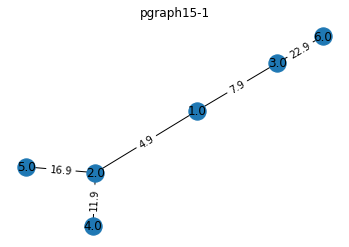

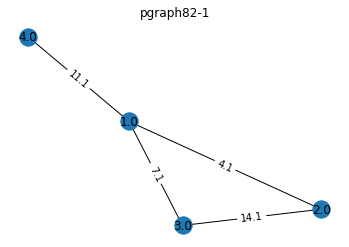

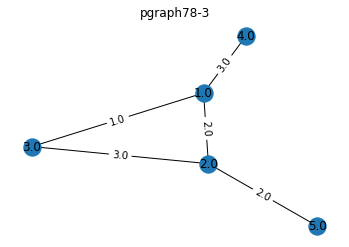

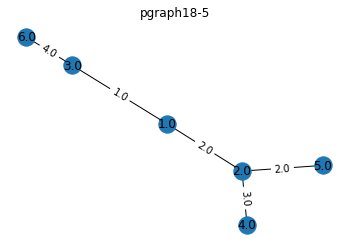

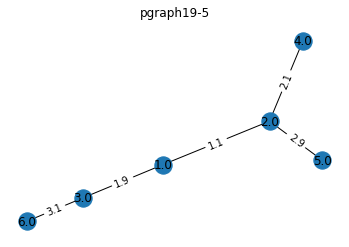

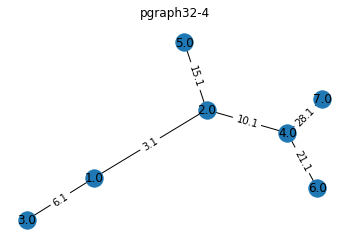

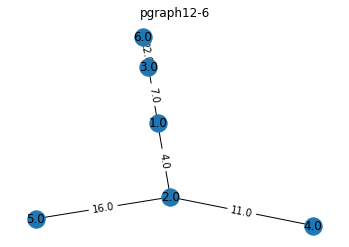

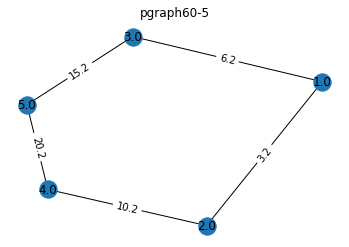

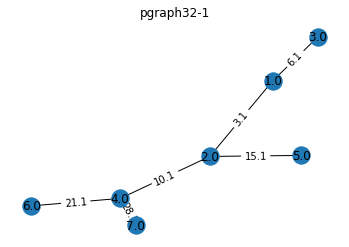

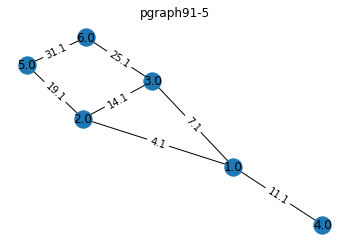

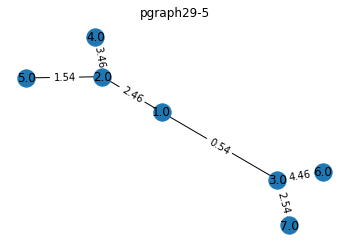

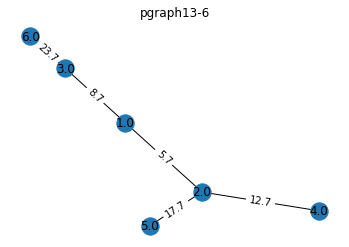

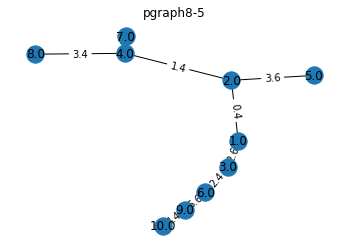

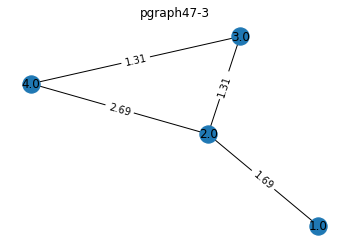

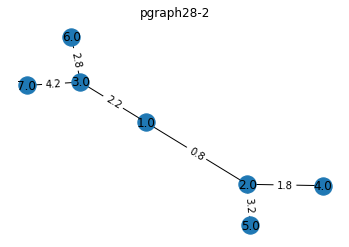

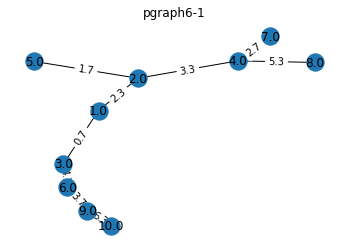

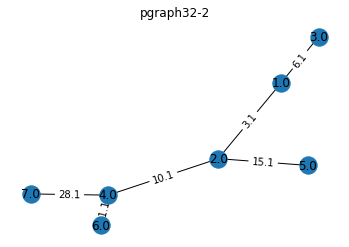

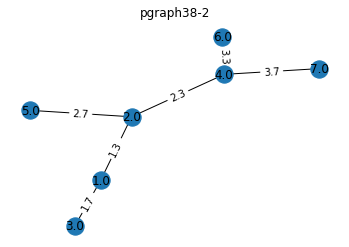

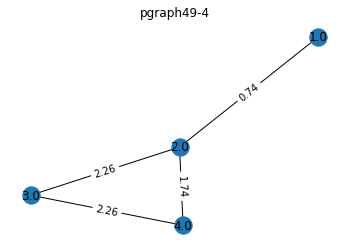

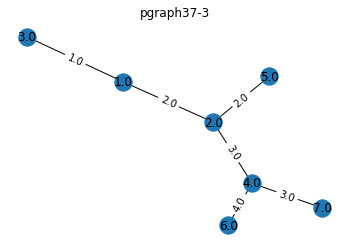

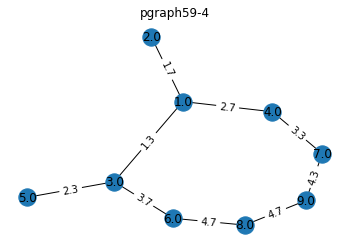

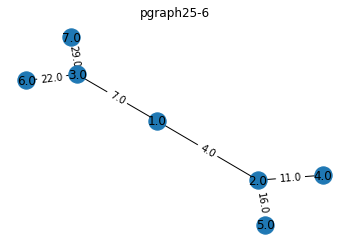

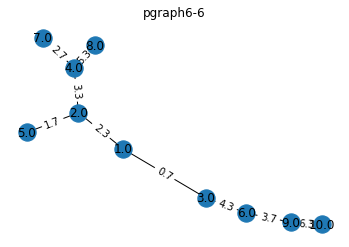

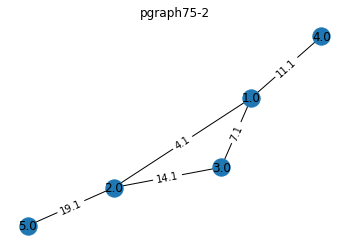

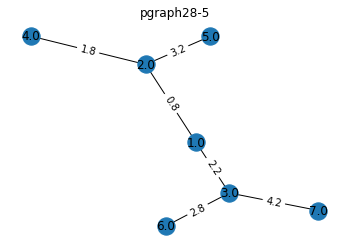

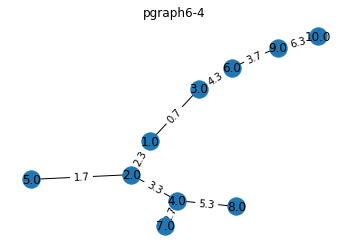

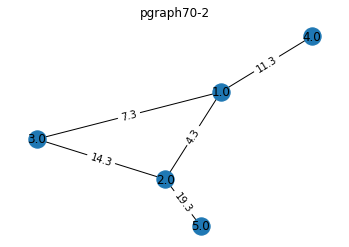

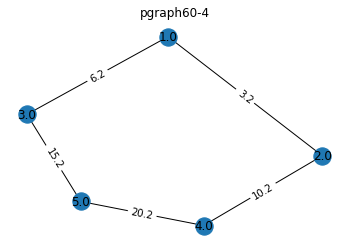

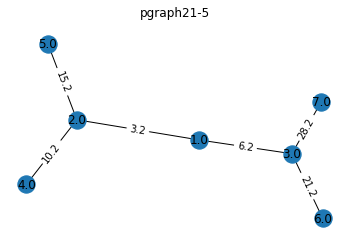

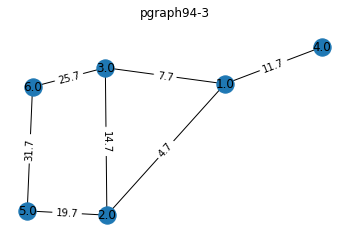

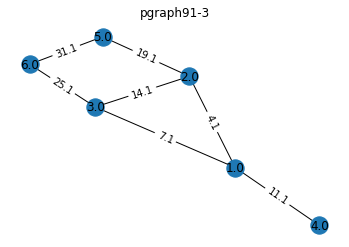

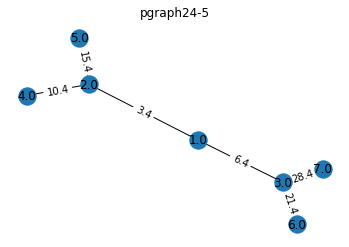

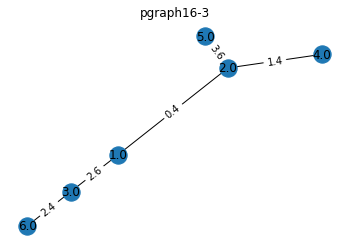

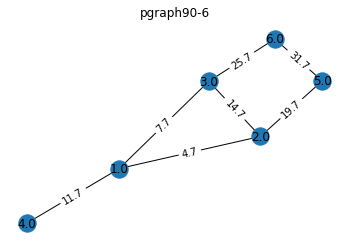

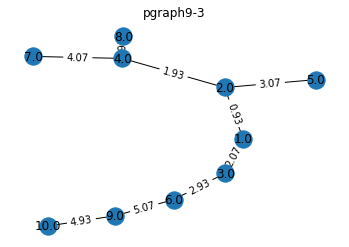

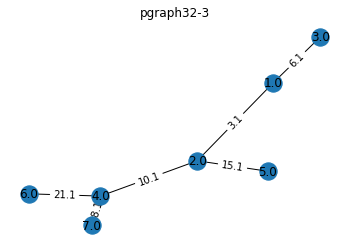

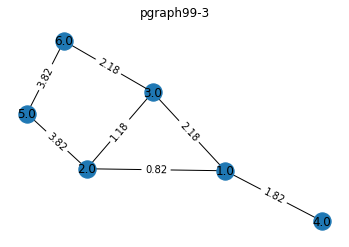

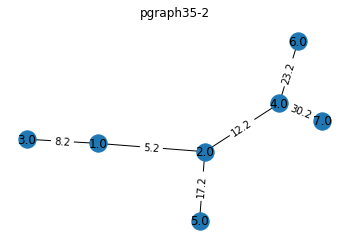

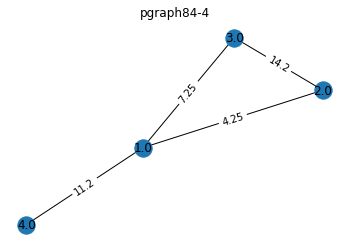

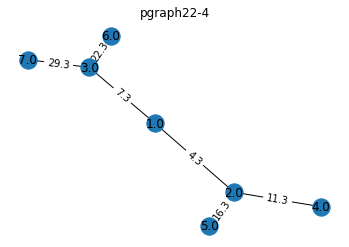

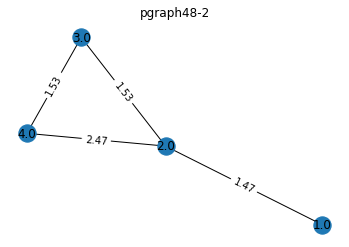

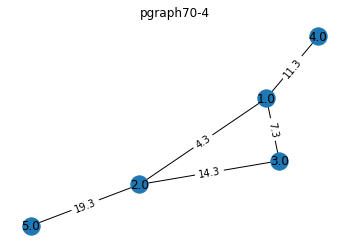

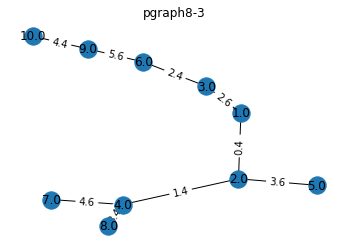

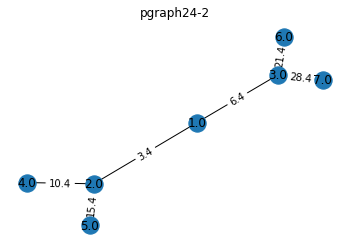

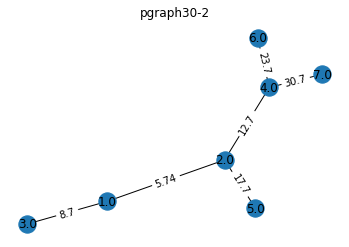

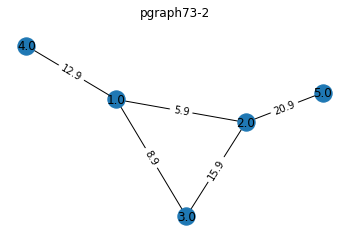

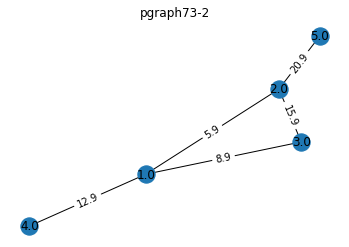

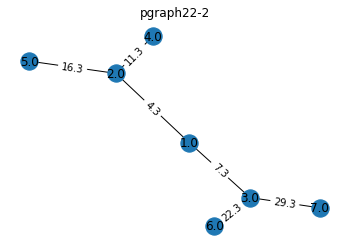

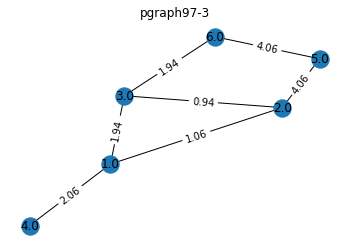

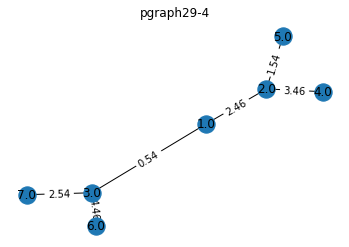

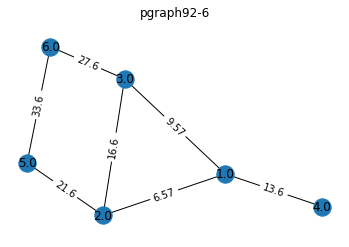

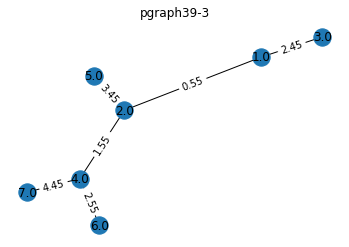

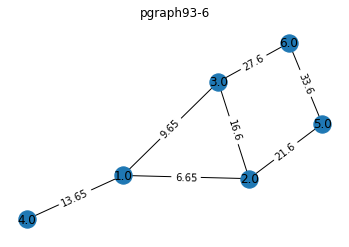

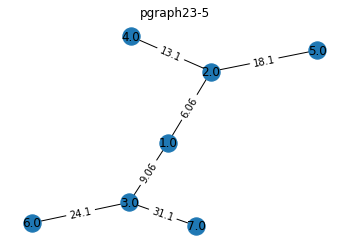

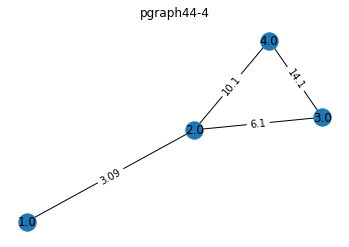

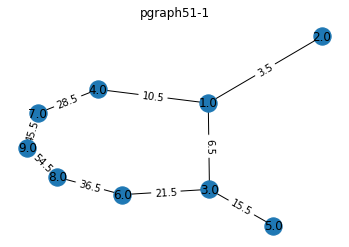

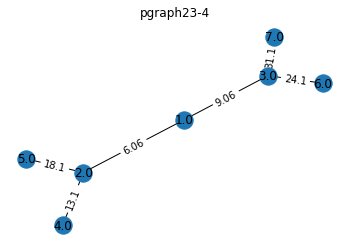

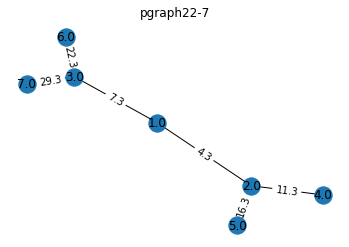

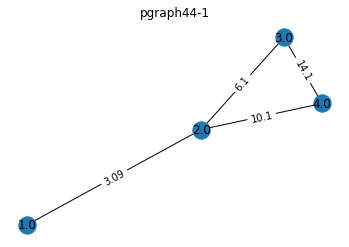

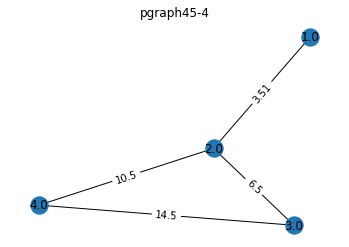

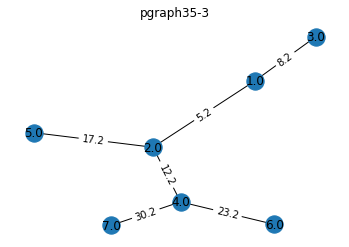

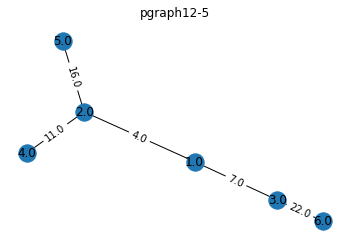

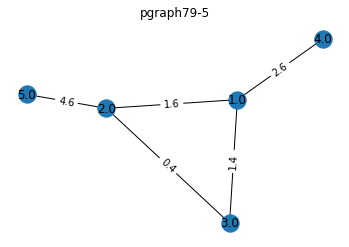

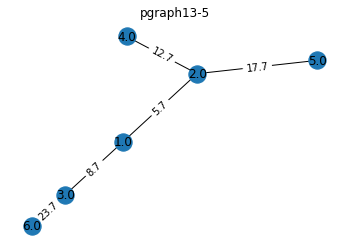

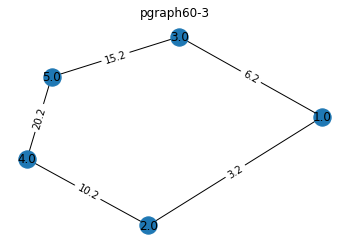

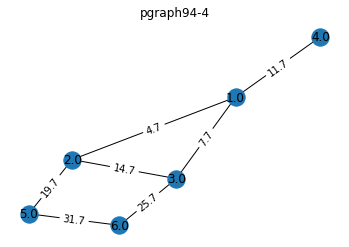

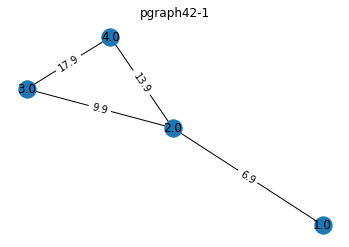

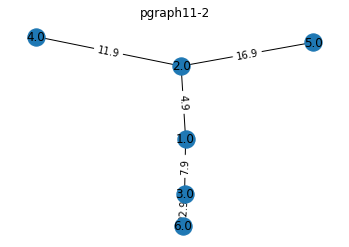

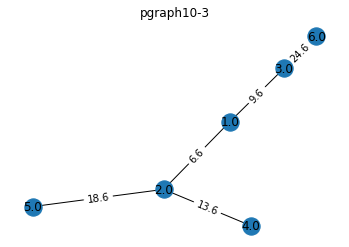

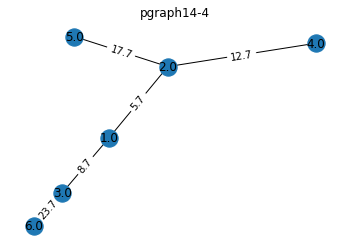

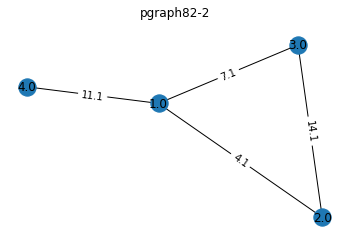

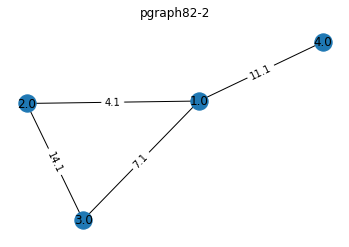

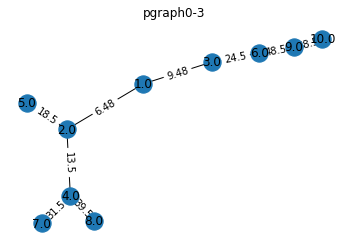

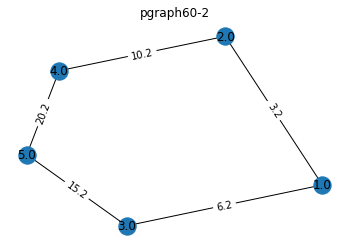

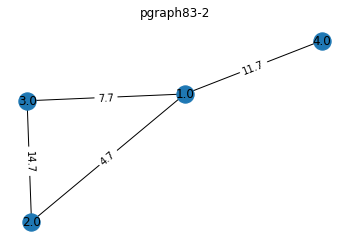

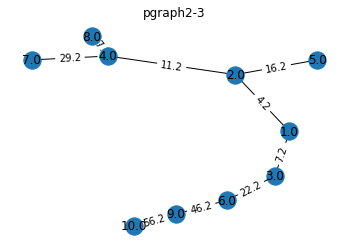

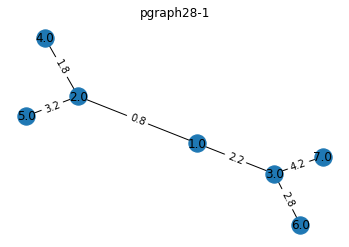

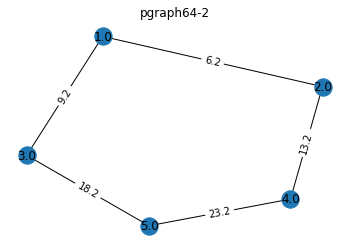

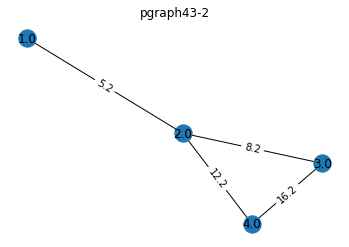

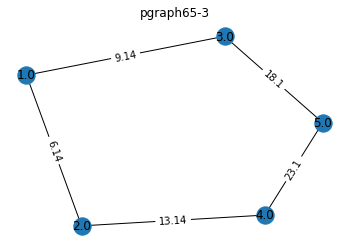

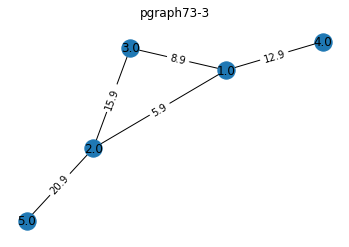

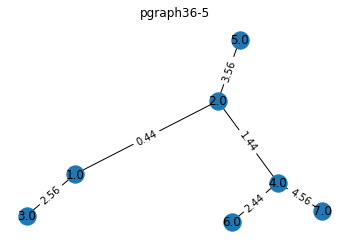

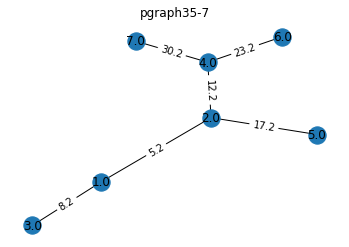

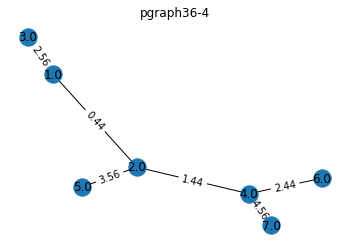

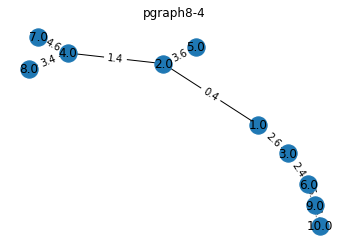

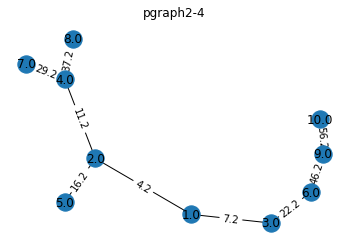

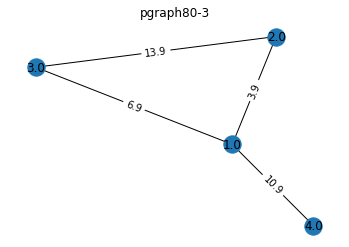

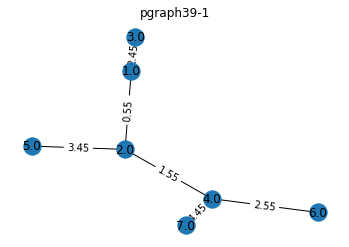

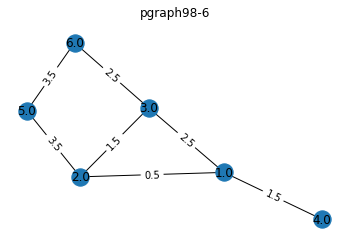

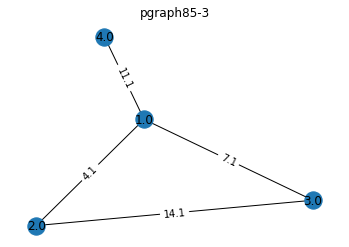

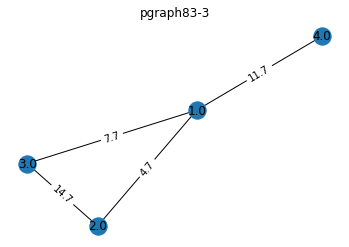

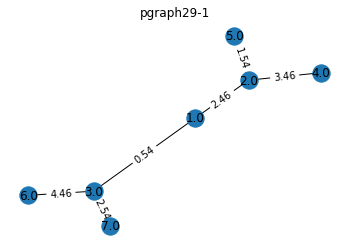

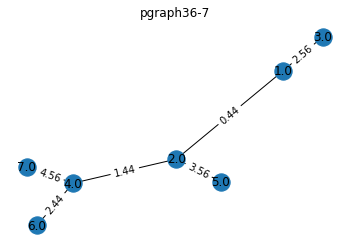

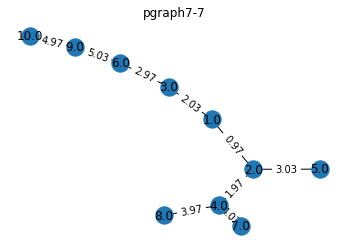

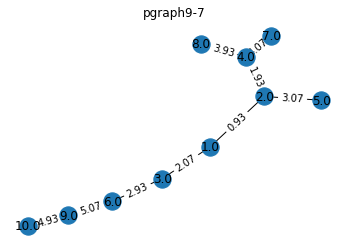

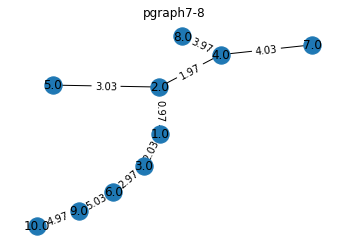

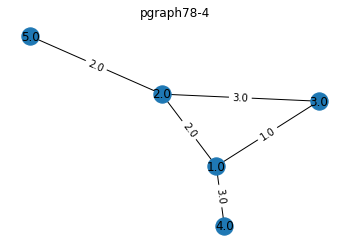

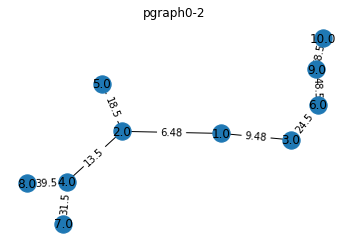

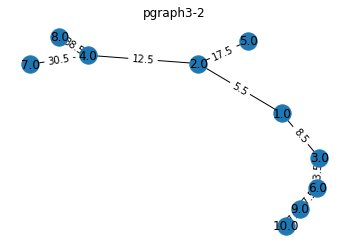

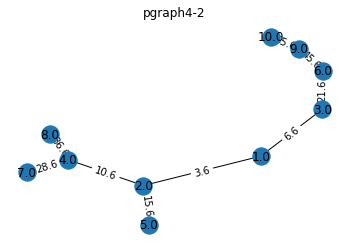

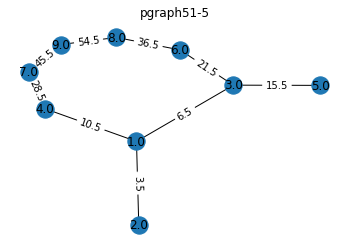

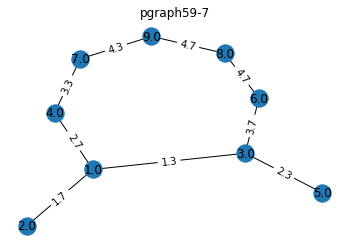

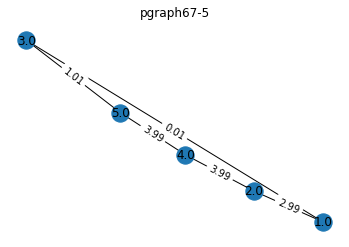

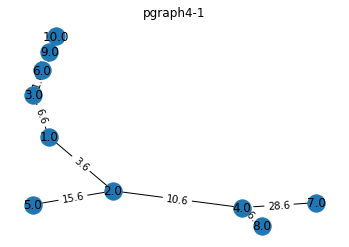

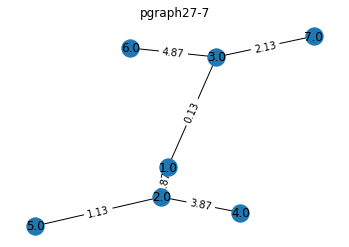

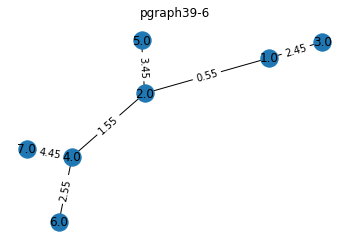

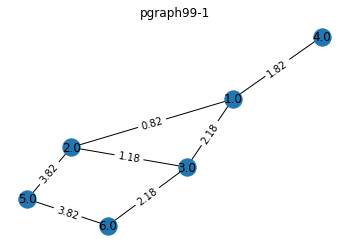

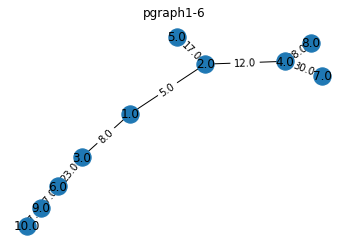

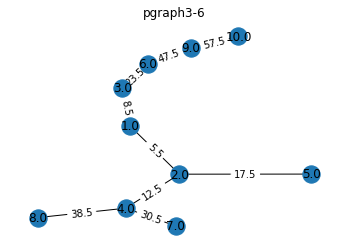

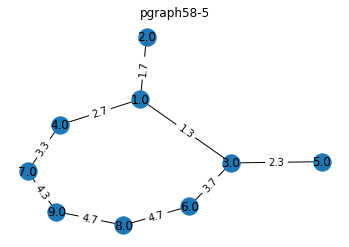

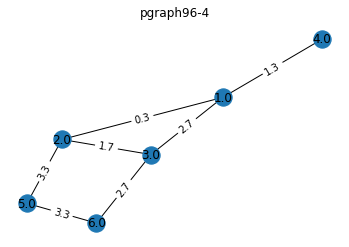

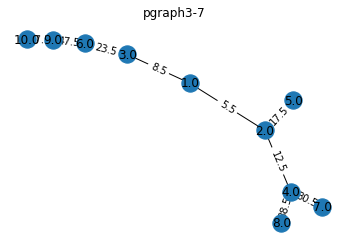

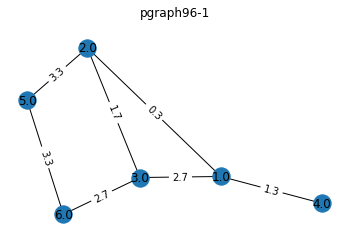

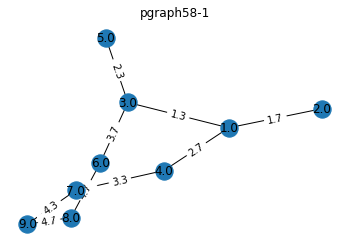

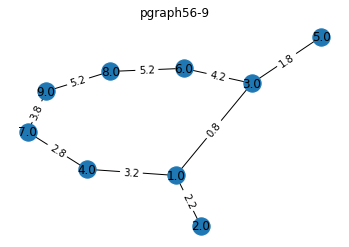

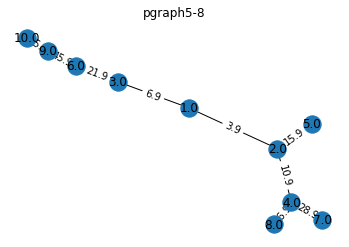

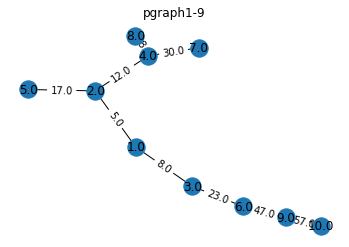

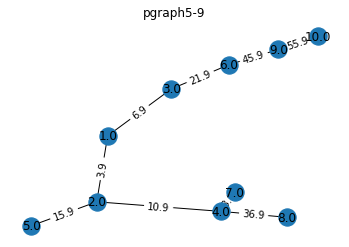

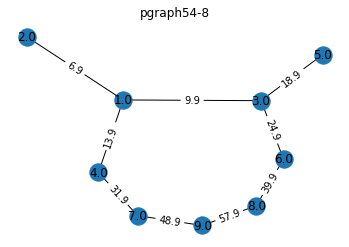

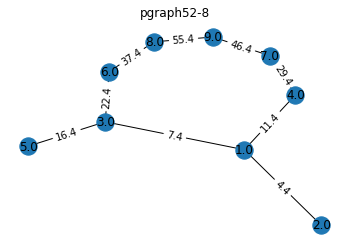

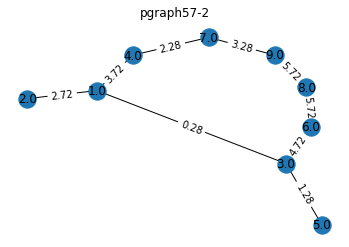

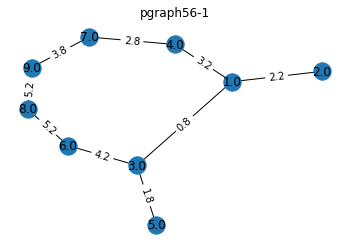

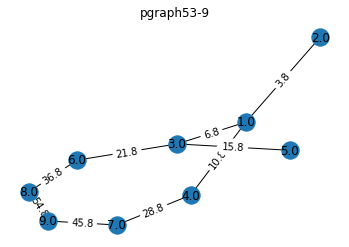

In [18]:
for index, name, seq in zip(range(len(names)), names, sequences):
    G.drawGraph('./result/', name, index, seq, True)